In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the preprocessed dataset
data = pd.read_csv("census_preprocessed_dataset.csv")

# Drop rows with missing target values
data = data.dropna(subset=["income"])

# Separate features (X) and target variable (y)
X = data.drop("income", axis=1)
y = data["income"]

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Define logistic regression pipeline
logistic_regression_pipeline = make_pipeline(SimpleImputer(strategy="mean"), LogisticRegression())

# Define hyperparameters to tune
hyperparameters = {
    'logisticregression__penalty': ['l2'],  # 'l2' penalty is compatible with 'lbfgs' solver
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['lbfgs'],  # Use 'lbfgs' solver
}

# Perform grid search cross-validation
grid_search = GridSearchCV(logistic_regression_pipeline, hyperparameters, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print best hyperparameters and their corresponding accuracy score
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy Score:", test_accuracy)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters:
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best Accuracy Score: 1.0
Test Accuracy Score: 1.0


In [2]:
from sklearn.metrics import accuracy_score

# Predictions on the training set
train_predictions = best_model.predict(X_train)
# Predictions on the test set
test_predictions = best_model.predict(X_test)

# Calculate accuracy on training set
train_accuracy = accuracy_score(y_train, train_predictions)
# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Check if there is overfitting
if train_accuracy > test_accuracy:
    print("The model is overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is underfitting.")
else:
    print("The model is well-fit.")


Training Accuracy: 1.0
Test Accuracy: 1.0
The model is well-fit.


In [ ]:
pip install joblib

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import joblib  # Import joblib directly

# Load the preprocessed dataset
data = pd.read_csv("census_preprocessed_dataset.csv")

# Drop rows with missing target values
data = data.dropna(subset=["income"])

# Separate features (X) and target variable (y)
X = data.drop("income", axis=1)
y = data["income"]

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Define logistic regression pipeline
logistic_regression_pipeline = make_pipeline(SimpleImputer(strategy="mean"), LogisticRegression())

# Define hyperparameters to tune
hyperparameters = {
    'logisticregression__penalty': ['l2'],
    'logisticregression__C': [0.01],
    'logisticregression__solver': ['lbfgs'],
    'logisticregression__max_iter': [100, 200, 300]  # Adjust max_iter parameter
}

# Perform grid search cross-validation
grid_search = GridSearchCV(logistic_regression_pipeline, hyperparameters, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Save the best model to disk
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'logistic_regression_model.pkl')
print("Logistic Regression model saved to disk.")



Fitting 5 folds for each of 3 candidates, totalling 15 fits
Logistic Regression model saved to disk.


In [4]:
X_test[[10]]

array([[-0.51298651, -1.32914438, -0.79338412,  0.48173151,  1.44562038,
        -1.80946423,  0.85148873, -0.08846905,  0.39893723, -1.49639765,
        -0.19722725, -0.25610829,  0.69442661,  0.30127369, -0.20791782,
         3.90688948, -0.01189982, -1.54263304, -0.24921468, -0.31896051,
        -0.2222278 , -0.01683008, -0.16798604, -0.10443449, -0.06293522,
        -0.08840852, -0.12547887, -0.11010448, -0.19739056, -0.22575959,
        -0.54771966, -0.168097  , -0.66117474,  3.81013999, -0.03213438,
        -0.19560942, -0.54145526, -0.03165766, -1.24929347, -0.10146321,
        -0.56733943, -0.15722767, -0.15954222, -0.34304214, -0.01548894,
        -0.39844729, -0.48525036, -0.16471404, -0.18592541, -0.24235253,
        -0.28444783, -0.05498058,  2.44036261, -0.16263802, -0.39124073,
        -0.19350397, -0.23053165,  2.04394278, -0.15045317, -0.34526431,
        -0.29916093, -0.28623998, -0.19374836, -0.30698965, -0.08423794,
         0.39889724, -1.71168717, -0.02761026, -0.0

In [5]:
import pandas as pd
import joblib

# Load the saved logistic regression model from disk
loaded_model = joblib.load('logistic_regression_model.pkl')

def predict_income(data):
    # Preprocess the input data (assuming the same preprocessing steps as in the training phase)
    # For example, you may need to handle missing values, encode categorical variables, and scale/normalize features

    # Make predictions using the loaded model
    predictions = loaded_model.predict(data)

    # Return the predictions
    return predictions

# Example usage:
# Load new data
#new_data = pd.read_csv("new_data.csv")  # Replace "new_data.csv" with the path to your new data file
# Make predictions
predictions = predict_income(X_test[[10]])
print(predictions)


[-1.]


Fitting 5 folds for each of 3 candidates, totalling 15 fits


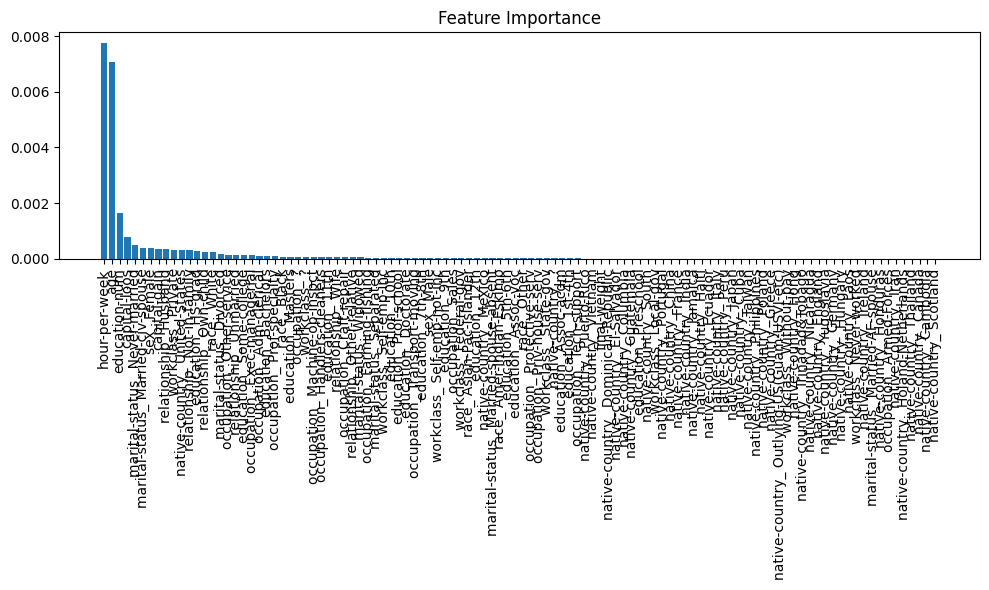

Classification Metrics with Top 5 Selected Features:
Accuracy: 0.8046882997236156
Precision: 0.7875088241879908
Recall: 0.8046882997236156
F1 Score: 0.787359679468985

Classification Metrics with All Features:
Accuracy: 0.8022315487767427
Precision: 0.7895787412675259
Recall: 0.8022315487767427
F1 Score: 0.7652380341298358


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("Census.csv")

# Drop rows with missing target values
data = data.dropna(subset=["income"])

# Separate features (X) and target variable (y)
X = data.drop("income", axis=1)
y = data["income"]

# One-hot encode categorical features
X = pd.get_dummies(X)

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Define logistic regression pipeline
logistic_regression_pipeline = make_pipeline(SimpleImputer(strategy="mean"), LogisticRegression())

# Define hyperparameters to tune
hyperparameters = {
    'logisticregression__penalty': ['l2'],
    'logisticregression__C': [0.01],
    'logisticregression__solver': ['lbfgs'],
    'logisticregression__max_iter': [100, 200, 300]  # Adjust max_iter parameter
}

# Perform grid search cross-validation
grid_search = GridSearchCV(logistic_regression_pipeline, hyperparameters, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Feature Importance
if hasattr(best_model.named_steps['logisticregression'], 'coef_'):
    feature_importance = np.abs(best_model.named_steps['logisticregression'].coef_[0])
else:
    feature_importance = best_model.named_steps['logisticregression'].feature_importances_

# Sort feature importance in descending order
indices = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Select the top 5 most important features
selected_features = X.columns[indices][:5]
X_train_selected = X_train[:, indices][:, :5]
X_test_selected = X_test[:, indices][:, :5]

# Train Logistic Regression with the best parameters using the selected features
best_params = grid_search.best_params_
logistic_regression_selected = LogisticRegression(C=best_params['logisticregression__C'],
                                                  penalty=best_params['logisticregression__penalty'],
                                                  solver=best_params['logisticregression__solver'],
                                                  max_iter=best_params['logisticregression__max_iter'])
logistic_regression_selected.fit(X_train_selected, y_train)–

# Predictions on the test set using the selected features
y_pred_selected = logistic_regression_selected.predict(X_test_selected)

# Evaluation metrics for selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected, average='weighted')
recall_selected = recall_score(y_test, y_pred_selected, average='weighted')
f1_selected = f1_score(y_test, y_pred_selected, average='weighted')

print("Classification Metrics with Top 5 Selected Features:")
print("Accuracy:", accuracy_selected)
print("Precision:", precision_selected)
print("Recall:", recall_selected)
print("F1 Score:", f1_selected)

# Train Logistic Regression with the best parameters using all features
logistic_regression_all = grid_search.best_estimator_
logistic_regression_all.fit(X_train, y_train)

# Predictions on the test set using all features
y_pred_all = logistic_regression_all.predict(X_test)

# Evaluation metrics for all features
accuracy_all = accuracy_score(y_test, y_pred_all)
precision_all = precision_score(y_test, y_pred_all, average='weighted')
recall_all = recall_score(y_test, y_pred_all, average='weighted')
f1_all = f1_score(y_test, y_pred_all, average='weighted')

print("\nClassification Metrics with All Features:")
print("Accuracy:", accuracy_all)
print("Precision:", precision_all)
print("Recall:", recall_all)
print("F1 Score:", f1_all)
